In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * 
from tensorflow.keras.preprocessing.sequence import * 

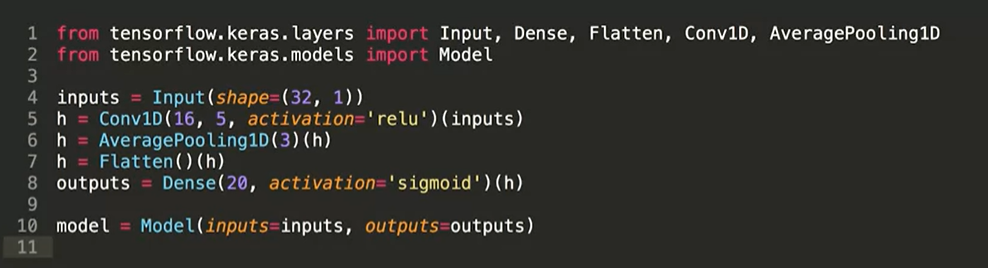

In [2]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

This time there is an input layer. this is where the input size is specified. providing the shape of a single data example.

use the model class to create the graph, this is infact where the sequential class inhertis its object info.

create instace of layers. this time you use layer object as function that calls on the layer input. you need to specify an output. and this then can be fed into a new layer object.

then on the last layer define the outputs.

then create a model object and pass in the inputs and outputs.

everything after this is then the same as when we made sequantial API.

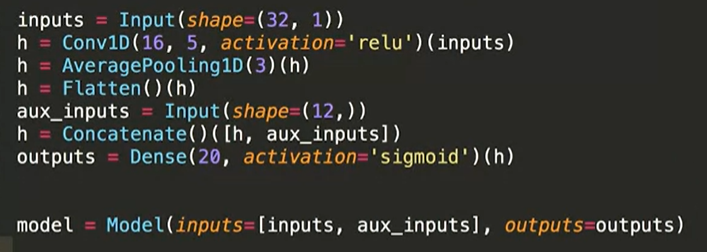

In [3]:
Image.open(r'C:\Users\44788/Desktop\it2.png')

This is an example of the use of the functional API. there are 2 inputs...

Concaternate, concaternates the tensor h with aux_inputs to make a single 1 dimensional vector tensor.

now you need to specify a list of inputs to the input. this si the same when there are mutliple outputs.

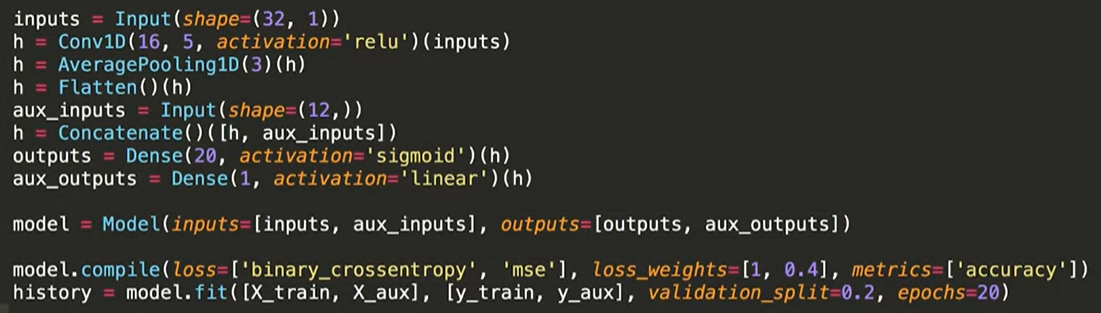

In [5]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

however, with multiple models, you need to be a bit more careful with how the model is compiled and trained. 

seperate outputs that are differnent that may need different loss functions. this is done when compiling. you sepcify a list of loss functions in the same order as the outputs are specified.

however, in order for their to be effective training there needs to be some combination of loss functions. this is specified with the loss_weights. it tells the loss functions how to combine.

the fit method also needs to have both the input and output data that the model needs. the order needs to be maintained. 

however, if you name the layers you can use dictionaries to map inputs and outputs instead of using ordered lists.

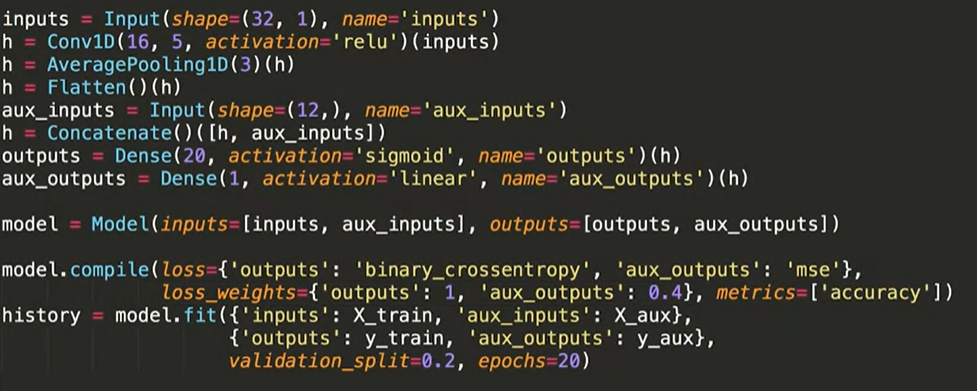

In [6]:
Image.open(r'C:\Users\44788/Desktop\it5.png')

In [2]:
from sklearn.model_selection import train_test_split
data = pd.read_csv(r'C:\Users\44788\Desktop\OctaveML\diagnosis.csv')

In [3]:
data

0  1  2  3  4  5  6  7
0    35.5  0  1  0  0  0  0  0
1    35.9  0  0  1  1  1  1  0
2    35.9  0  1  0  0  0  0  0
3    36.0  0  0  1  1  1  1  0
4    36.0  0  1  0  0  0  0  0
..    ... .. .. .. .. .. .. ..
115  41.4  0  1  1  0  1  0  1
116  41.5  0  0  0  0  0  0  0
117  41.5  1  1  0  1  0  0  1
118  41.5  0  1  1  0  1  0  1
119  41.5  0  1  1  0  1  0  1

[120 rows x 8 columns]

has 8 attributes.
6 inputs.
2 outputs (yes/no1, yes/no2).

In [4]:
dataset = data.values

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [19]:
# split inputs
temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = X_train.T
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = X_test.T

In [22]:
inflam_train, nephr_train = Y_train[:,0], Y_train[:,1]
inflam_test, nephr_test = Y_test[:,0], Y_test[:,1]

In [23]:
shape_inputs = (1,)
temperature = Input(shape=shape_inputs, name='temp')
nausea_occurence = Input(shape=shape_inputs, name='nau')
lumbar_pain = Input(shape=shape_inputs, name='lum')
urine_pushing = Input(shape=shape_inputs, name='uri')
micturation_pains = Input(shape=shape_inputs, name='mic')
bis = Input(shape=shape_inputs, name='bis')

In [24]:
list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, micturation_pains, bis]

In [25]:
# concaternate all inputs
x = concatenate(list_inputs)

In [26]:
inflammation_pred = Dense(1, activation='sigmoid', name='infla')(x)
nephr_pred = Dense(1, activation='sigmoid', name='nephr')(x)

In [27]:
list_outputs = [inflammation_pred, nephr_pred]

In [28]:
model = Model(inputs=list_inputs, outputs=list_outputs)

In [64]:
model.compile(optimizer=RMSprop(1e-3),
             loss=['binary_crossentropy', 'binary_crossentropy'],
             metrics=[['acc'], ['acc']],
             loss_weights=[1.,0.2])

In [65]:
# define inputs and outputs 
inputs_train = {'temp':temp_train, 'nau':nocc_train, 'lum':lumbp_train, 'uri':up_train,
                'mic':mict_train, 'bis':bis_train}
outputs_train = {'infla':inflam_train , 'nephr':nephr_train}

In [66]:
history = model.fit(inputs_train, outputs_train, epochs=1000, batch_size=128, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [67]:
keys = history.history.keys()
values = history.history
list(keys)

['loss', 'infla_loss', 'nephr_loss', 'infla_acc', 'nephr_acc']

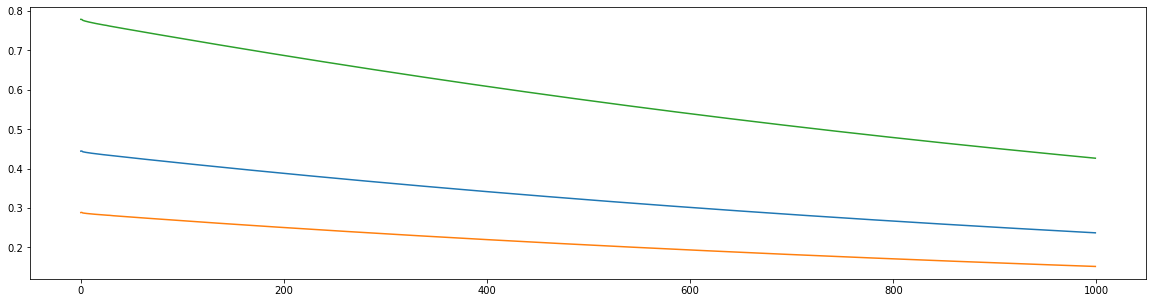

In [68]:
#losses
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
for key in list(keys)[:3]:
    axs.plot(np.arange(0,1000), values[key])

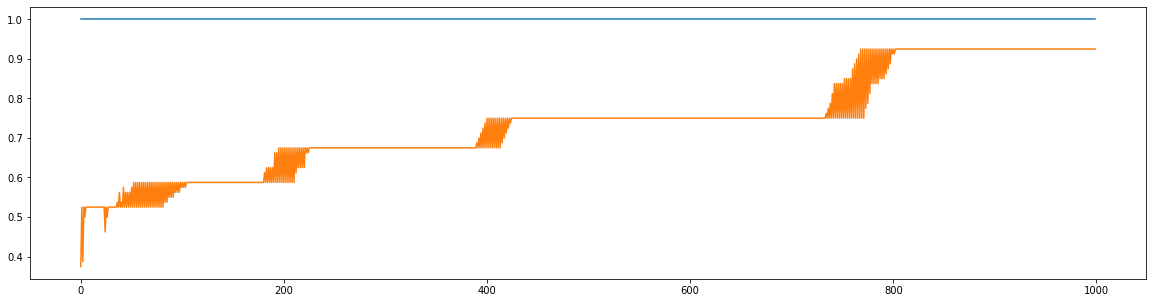

In [69]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
for key in list(keys)[3:]:
    axs.plot(np.arange(0,1000), values[key])

In [70]:
model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],
              [inflam_test, nephr_test], verbose=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 - 0s - loss: 0.2419 - infla_loss: 0.1573 - nephr_loss: 0.4228 - infla_acc: 1.0000 - nephr_acc: 0.9000


[0.24189439415931702,
 0.15732547640800476,
 0.42284446954727173,
 1.0,
 0.8999999761581421]

# variables

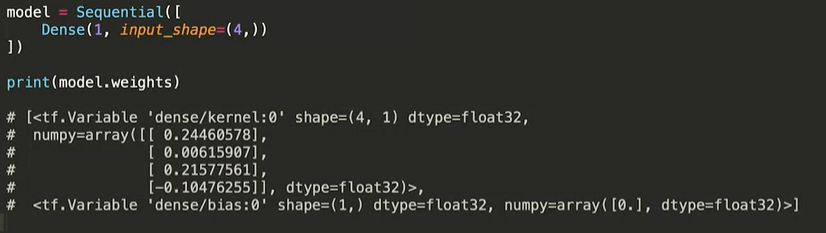

In [71]:
Image.open(r'C:\Users\44788/Desktop\it6.png')

tf.variable - dense/kernel.
shape is 4,1. 
and its dtypte is float32.

these persist during the course of your program but can be updates during the course of the program.
can create tf variables.

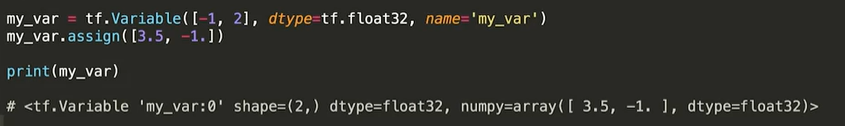

In [73]:
Image.open(r'C:\Users\44788/Desktop\it8.png')

can convert it to numpy array by:
    
my_var.numpy()

# Tensors
tensors are the object that get passed around throughout the graph. and capture the computations within the graph. e.g. the pass of the tensor into a layer where the computation within the layer object is executed and the output tensor is passed out value. they carry the information through the graph.

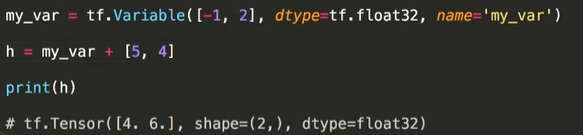

In [74]:
Image.open(r'C:\Users\44788/Desktop\it9.png')

this is a simple graph computation. h is the output of the operation and is therefore a tensor output.

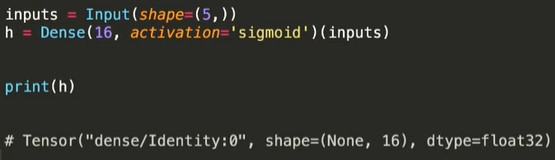

In [75]:
Image.open(r'C:\Users\44788/Desktop\it10.png')

This is also a tensor, however, the value of the tensor is not known yet, so it is 'empty'. this value will depend on the input that is fed in. the layer object specifies how the computation should be calculated.

this tensor value is only generated when the graph is executed. however, the shapes of the tensor tell us what size the tensor will be when the graph is executed.

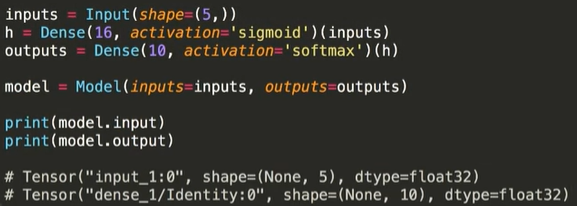

In [76]:
Image.open(r'C:\Users\44788/Desktop\it11.png')

This is true of the model as a whole. it will have an input and output tensor.

it is possible to create a tensorflow tensor that is constant:

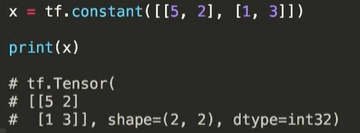

In [77]:
Image.open(r'C:\Users\44788/Desktop\it12.png')

In [78]:
strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [79]:
tf.Variable(tf.constant(4.2, shape=(3,3)))

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2]], dtype=float32)>

In [81]:
v = tf.Variable(0.0)
w = v+1
print(w) # returns a tensor

tf.Tensor(1.0, shape=(), dtype=float32)


In [82]:
v.assign_add(1)
print(v) # returns variable as no graph has been executed

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [83]:
v.assign_sub(1)
print(v) 

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


In [84]:
x = tf.constant([[1,1,1],[1,1,1],[1,1,1]])
print(x)

tf.Tensor(
[[1 1 1]
 [1 1 1]
 [1 1 1]], shape=(3, 3), dtype=int32)


In [85]:
x.numpy()

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [87]:
# specify type
x = tf.constant([[1,1,1],[1,1,1],[1,1,1]], dtype=tf.float32)
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [91]:
t = tf.constant(np.arange(80), shape=[5,2,8])

In [92]:
# get rank of tensor
print(tf.rank(t))

tf.Tensor(3, shape=(), dtype=int32)


In [94]:
# reshape tensor
t2 = tf.reshape(t, [8,10])

In [95]:
t2.shape

TensorShape([8, 10])

In [98]:
ones = tf.ones(shape=(2,3))
zeros = tf.zeros(shape=(2,3))
eye = tf.eye(3) # identity 
tensor7 = tf.constant(7.0, shape=[2,2])

In [99]:
t1 = tf.ones(shape=(2,3))
t2 = tf.zeros(shape=(2,3))
print(t1, t2)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32) tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [100]:
concat0 = tf.concat([t1,t2], 0)
print(concat0)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float32)


In [101]:
concat1 = tf.concat([t1,t2], 1)
print(concat1)

tf.Tensor(
[[1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]], shape=(2, 6), dtype=float32)


In [102]:
t = tf.constant(np.arange(24), shape=(3,2,4))
t.shape

TensorShape([3, 2, 4])

In [104]:
# in many problems expanding the dimensions may be important, 
# for example when working with images
dim = tf.expand_dims(t, 3)
dim.shape

TensorShape([3, 2, 4, 1])

In [107]:
sq = tf.squeeze(dim, 3)
sq.shape

TensorShape([3, 2, 4])

In [113]:
# slicing like numpy
t = tf.constant(np.arange(24), shape=(24))
t[:5]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4])>

In [124]:
t1 = tf.constant(np.random.randn(6), shape=(3,2))
t2 = tf.constant(np.arange(6), shape=(2,3), dtype=tf.float64)

In [125]:
# matrix multiplication
matmul = tf.matmul(t1,t2)
matmul

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[ 3.79068012,  6.33269413,  8.87470813],
       [-5.23605608, -5.18314573, -5.13023538],
       [ 2.88872905,  4.50307955,  6.11743005]])>

In [128]:
# elementwise operations
t1-tf.transpose(t2)

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[ 1.27845396, -1.73643996],
       [ 0.79826238, -5.74535203],
       [-1.34855918, -4.03709032]])>

In [129]:
t1+tf.transpose(t2)
# this is the same for any of the normal python operations

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[1.27845396, 4.26356004],
       [2.79826238, 2.25464797],
       [2.65144082, 5.96290968]])>

In [130]:
tf.abs(t1-tf.transpose(t2))

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[1.27845396, 1.73643996],
       [0.79826238, 5.74535203],
       [1.34855918, 4.03709032]])>

In [132]:
tf.random.normal(shape=(2,2), mean=0, stddev=1)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.9549565, -0.0924904],
       [ 1.5328395,  1.4637992]], dtype=float32)>

In [133]:
tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 5],
       [6, 8]])>

In [134]:
tf.cos(t1)

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[ 0.28819599,  0.3024255 ],
       [-0.22550957, -0.17367061],
       [ 0.79521101,  0.57113397]])>

# Accessing layer Variables + Tensors
for example dig into the model to look at the activations at a particular layer.

or pull out weigths of convolutional layer.

reuse parts of a trained model.

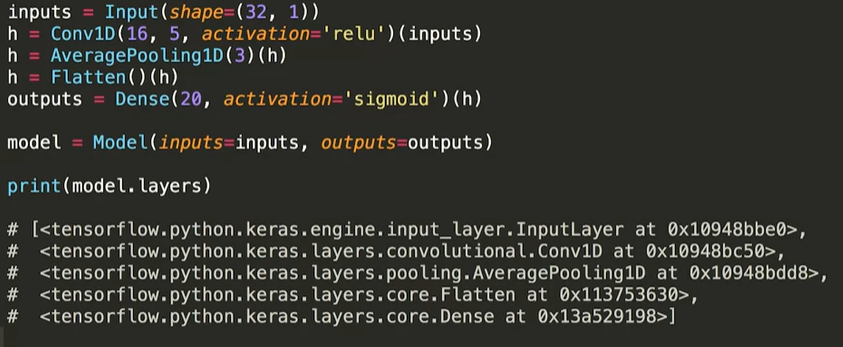

In [135]:
Image.open(r'C:\Users\44788/Desktop\it13.png')

you can index the layers also with model.layers[i]

you can then access the weights of that layer...

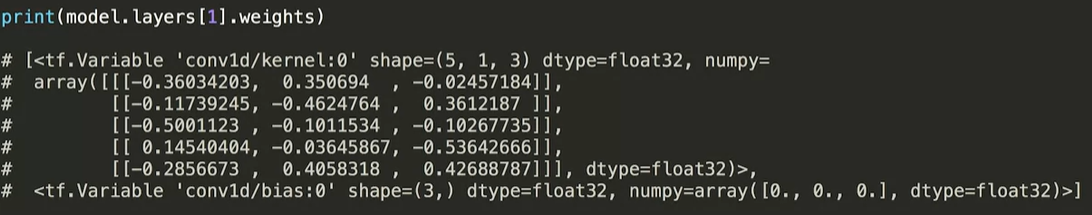

In [137]:
Image.open(r'C:\Users\44788/Desktop\it14.png')

model weights are tf variables.

if you use either model.layers[1].get_weights or model.layers[1].numpy() to get the model weights as arrays.

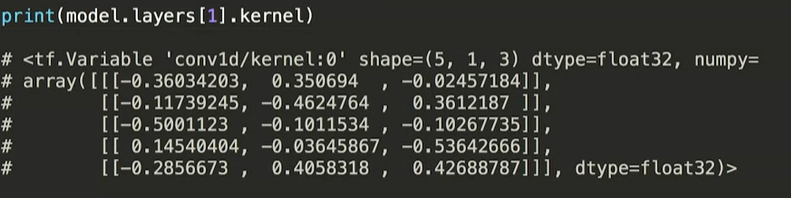

In [138]:
Image.open(r'C:\Users\44788/Desktop\it16.png')

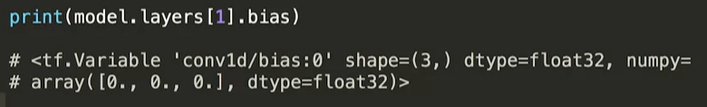

In [139]:
Image.open(r'C:\Users\44788/Desktop\it17.png')

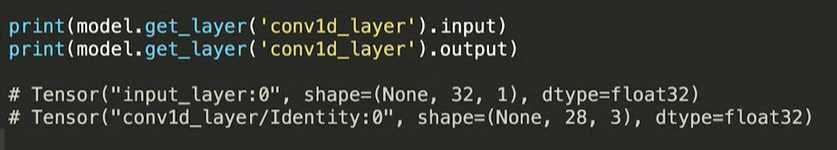

In [140]:
Image.open(r'C:\Users\44788/Desktop\it18.png')

every layer and model has an input and output tensor.

infact when you construct a model you have to pass in the input and output tensor.

this means that you can build models from tensors that you access from outputs of other models.

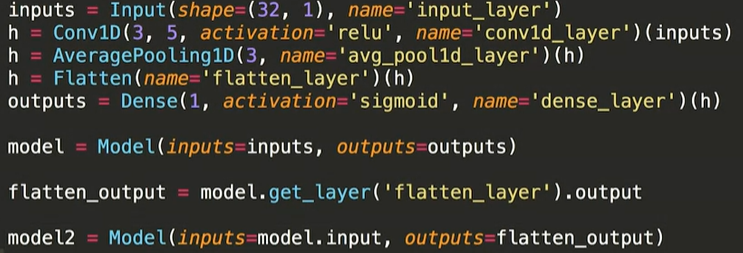

In [141]:
Image.open(r'C:\Users\44788/Desktop\it19.png')

In this example, the output of the flatten layer is specified as the output for a second model. this removes the final dense layer of the model. 

taking this a step further and we have transfer learning. 

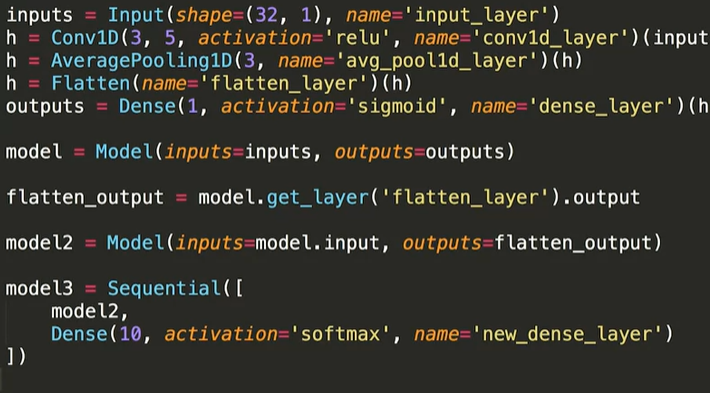

In [142]:
Image.open(r'C:\Users\44788/Desktop\it20.png')

In this example we are using an entire model as one of the inputs to this sequential model. 

and with the functional API;

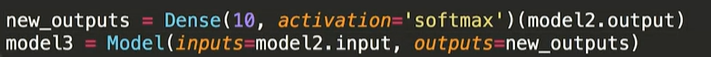

In [143]:
Image.open(r'C:\Users\44788/Desktop\21.png')

or more simply

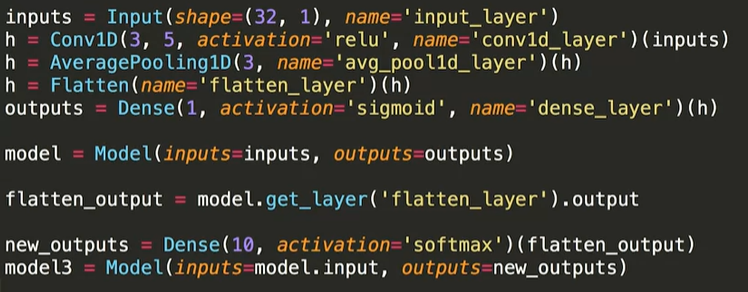

In [144]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

In [2]:
from tensorflow.keras.applications import VGG19

In [3]:
vgg_model = VGG19()

574717952/574710816 [==============================] - 46s 0us/step


In [4]:
vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# build a model that returns the layer outputs

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs=vgg_input, outputs=layer_outputs)

In [19]:
img = np.random.random((1,224,224,3)).astype('float32')
extracted_features1 = features(img)

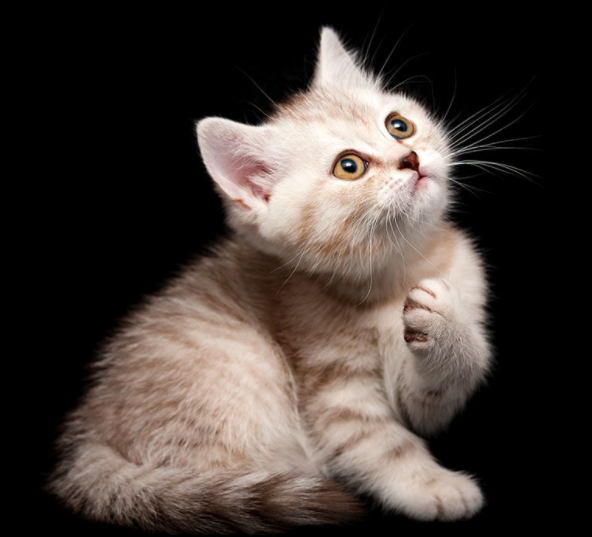

In [8]:
Image.open(r'C:\Users\44788/Desktop\cat_image.png')

In [16]:
img_path = r'C:\Users\44788/Desktop\cat_image.png'
img = load_img(img_path, target_size=(224,224))
x = img_to_array(img) # adds channels
x = np.expand_dims(x, axis=0) # add first dimension for number of images, this case 1
from tensorflow.keras.applications.vgg19 import preprocess_input
x = preprocess_input(x)

In [20]:
extracted_features2 = features(x)

In [43]:
def look_at_conv(model_output, layer_number):    
    f1 = model_output[layer_number]
    imgs = f1[0,:,:]
    plt.figure(figsize=(10,10))
    noc = model_output[layer_number].shape[3]
    for n in range(noc):
        ax = plt.subplot(noc/8,8,n+1)
        plt.imshow(imgs[:,:,n])
        plt.axis('off')

C:\Users\44788\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


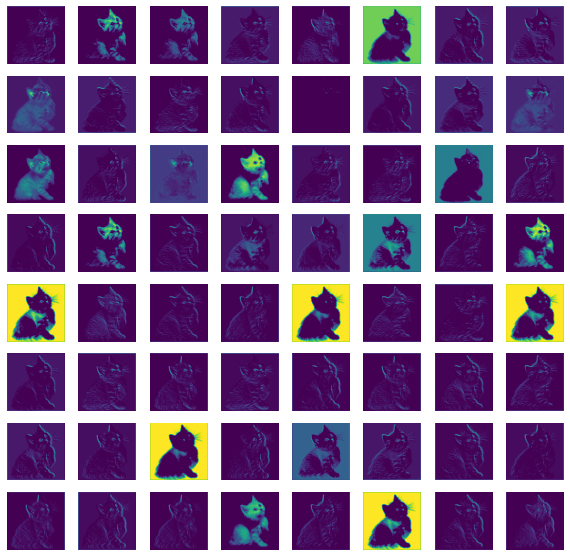

In [44]:
look_at_conv(extracted_features2, 1)

C:\Users\44788\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


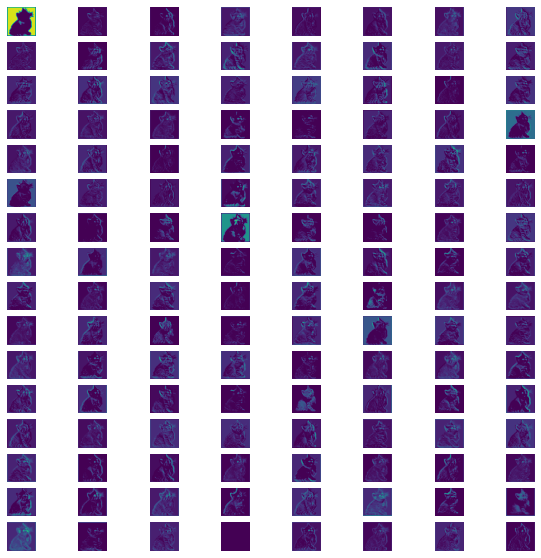

In [48]:
look_at_conv(extracted_features2, 4)

In [50]:
layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs=vgg_input, outputs=layer_outputs)

extracted_features_block1_pool = Model(inputs=features.input, outputs=features.get_layer('block1_pool').output)
block1_pool_features = extracted_features_block1_pool.predict(x)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


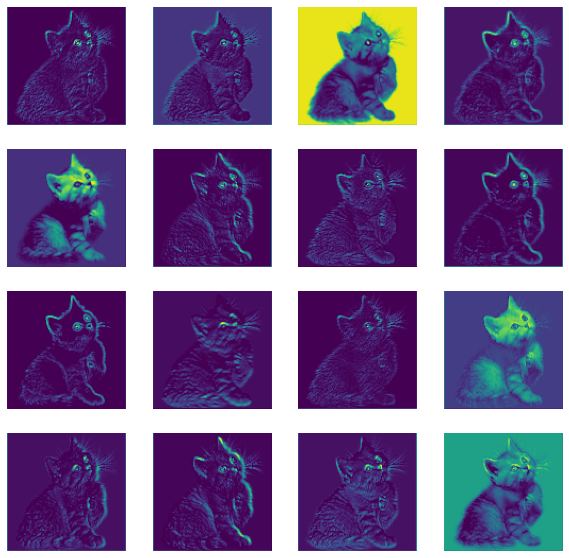

In [51]:
imgs = block1_pool_features[0,:,:]
plt.figure(figsize=(10,10))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


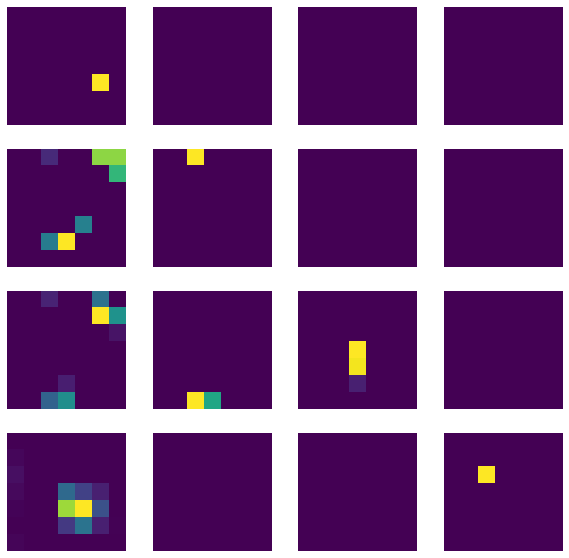

In [52]:
extracted_features_block5_pool = Model(inputs=features.input, outputs=features.get_layer('block5_pool').output)
block5_pool_features = extracted_features_block5_pool.predict(x)

imgs = block5_pool_features[0,:,:]
plt.figure(figsize=(10,10))
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')

# Freezing Layers

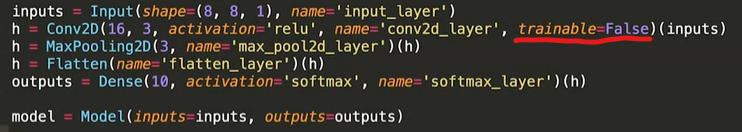

In [54]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

by setting trainable to false, the weights of that layer will not change during the training.

another solution is to freeze the model after it is built.

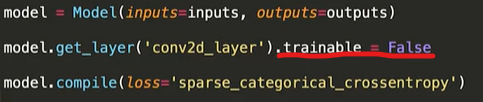

In [55]:
Image.open(r'C:\Users\44788/Desktop\it2.png')

this is extremely useful when using a pretrained model.

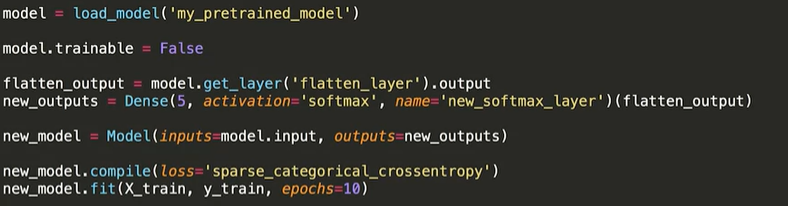

In [56]:
Image.open(r'C:\Users\44788/Desktop\it3.png')

In [61]:
inputs = Input(shape=(4,))
x = Dense(4, activation='relu', kernel_initializer='random_uniform')(inputs)
x = Dense(2, activation='relu', kernel_initializer='lecun_normal')(x)
outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [75]:
W0 = model.layers[1].kernel.numpy()
B0 = model.layers[1].bias.numpy()

In [76]:
x_train = np.random.random((100, 4))
y_train = x_train
x_test = np.random.random((20, 4))
y_test = x_test

In [77]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['acc'])
model.fit(x_train, y_train, epochs=50, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [78]:
W0_after = model.layers[1].kernel.numpy()
B0_after = model.layers[1].bias.numpy()

In [90]:
print('before \n', W0)
print('after \n', W0_after)

before 
 [[-0.01318834  0.04060477 -0.01175452  0.00315765]
 [-0.04925239 -0.0295453   0.03695858 -0.01301057]
 [-0.02659181 -0.02153406 -0.02945923  0.03034855]
 [ 0.01272216  0.04193585 -0.04133303 -0.01563721]]
after 
 [[-0.01318834  0.20093302 -0.07349468 -0.01173684]
 [-0.04925239 -0.19301268  0.1987503  -0.01938394]
 [-0.02659181  0.06809784  0.01738488  0.0154751 ]
 [ 0.01272216  0.17928547 -0.0500949  -0.02918086]]


In [91]:
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [92]:
print('before freezing: \n number of trainable variables:',  n_trainable_variables, '\n number of non trainable variables:',  n_non_trainable_variables)

before freezing: 
 number of trainable variables: 6 
 number of non trainable variables: 0


In [96]:
model.get_layer('dense').trainable = False
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)
print('before freezing: \n number of trainable variables:',  n_trainable_variables, '\n number of non trainable variables:',  n_non_trainable_variables)

before freezing: 
 number of trainable variables: 4 
 number of non trainable variables: 2
